# Machine Learning with Tree-Based Models in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
import warnings

jtplot.style(theme='chesterish')
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'
%run Machine_Learning_with_Tree-Based_Models_in_Python/plot_labeled.py

## Chapter 1. Classification and Regression Trees

## 1. Decision-Tree for Classication

### Classication-tree

* Sequence ofif-else questions about individual features.
* Objective: infer class labels.
* Able to capture non-linear relationships between features and labels.
* Don't require feature scaling (ex: Standardization, ..)

### Breast Cancer Dataset in 2D

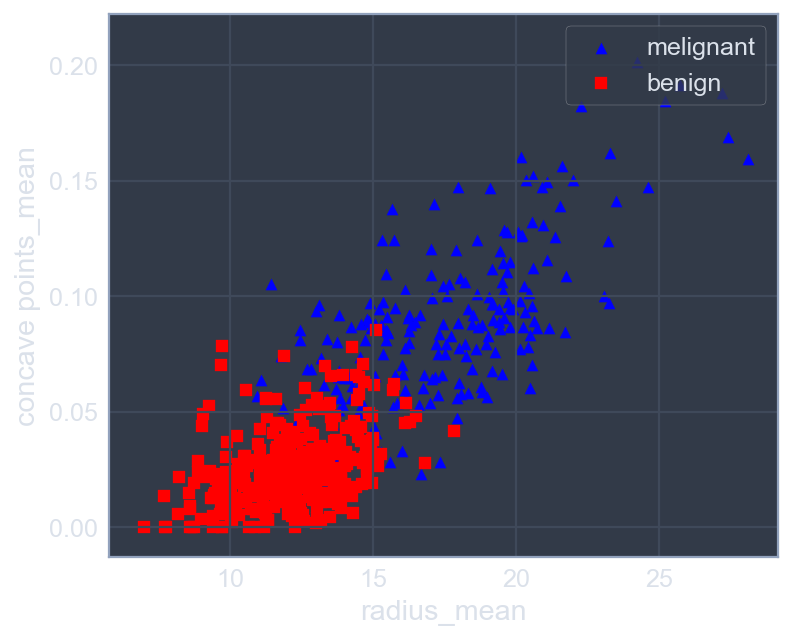

In [2]:
wbc = pd.read_csv('Machine_Learning_with_Tree-Based_Models_in_Python/wbc.csv', index_col='id')

plt.figure(figsize=(6,5))
plt.scatter(wbc[wbc['diagnosis'] == 'M']['radius_mean'],
            wbc[wbc['diagnosis'] == 'M']['concave points_mean'],
            marker='^', color='blue', label='melignant')
plt.scatter(wbc[wbc['diagnosis'] == 'B']['radius_mean'],
            wbc[wbc['diagnosis'] == 'B']['concave points_mean'],
            marker='s', color='red', label='benign')

plt.legend(loc='upper right')
plt.xlabel('radius_mean')
plt.ylabel('concave points_mean')

plt.show()

### Decision-tree Diagram

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Decision_tree_Diagram.png' alt='Decision-tree_Diagram' width=400 align='left'>

### Classication-tree in scikit-learn

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

wbc['diagnosis'] = wbc['diagnosis'].replace('M', 1)
wbc['diagnosis'] = wbc['diagnosis'].replace('B', 0)

X = wbc.iloc[:, 1:]
y = wbc['diagnosis']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=1)
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

In [4]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.9035087719298246

### Decision Regions

* Decision region: region in the feature space where all instances are assigned to one class label
* Decision Boundary: surface separating different decision regions

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Decision_Regions.png' alt='Decision Regions' width=400 align='left'>

### Decision Regions: CART vs. Linear Model

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/CART_vs_Linear_Model.png' alt='CART vs. Linear Model' width=800 align='left'>

### №1 Train your first classification tree

* Import `DecisionTreeClassifier`from `sklearn.tree`
* Instantiate a `DecisionTreeClassifier``dt`of maximum depth equal to 6
* Fit `dt`to the training set
* Predict the test set labels and assign the result to `y_pred`

In [5]:
from sklearn.tree import DecisionTreeClassifier

SEED = 1
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 0 1 0]


### №2 Evaluate the classification tree

* Import the function `accuracy_score` from `sklearn.metrics`.
* Predict the test set labels and assign the obtained array to `y_pred`.
* Evaluate the test set accuracy score of `dt` by calling `accuracy_score()` and assign the value to `acc`

In [6]:
from sklearn.metrics import accuracy_score

y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.93


### №3 Logistic regression vs classification tree

* Import `LogisticRegression` from `sklearn.linear_model`
* Instantiate a `LogisticRegression` model and assign it to `logreg`
* Fit `logreg` to the training set
* Review the plot generated by `plot_labeled_decision_regions()`

In [7]:
X = wbc.iloc[:, 1:3]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=1)

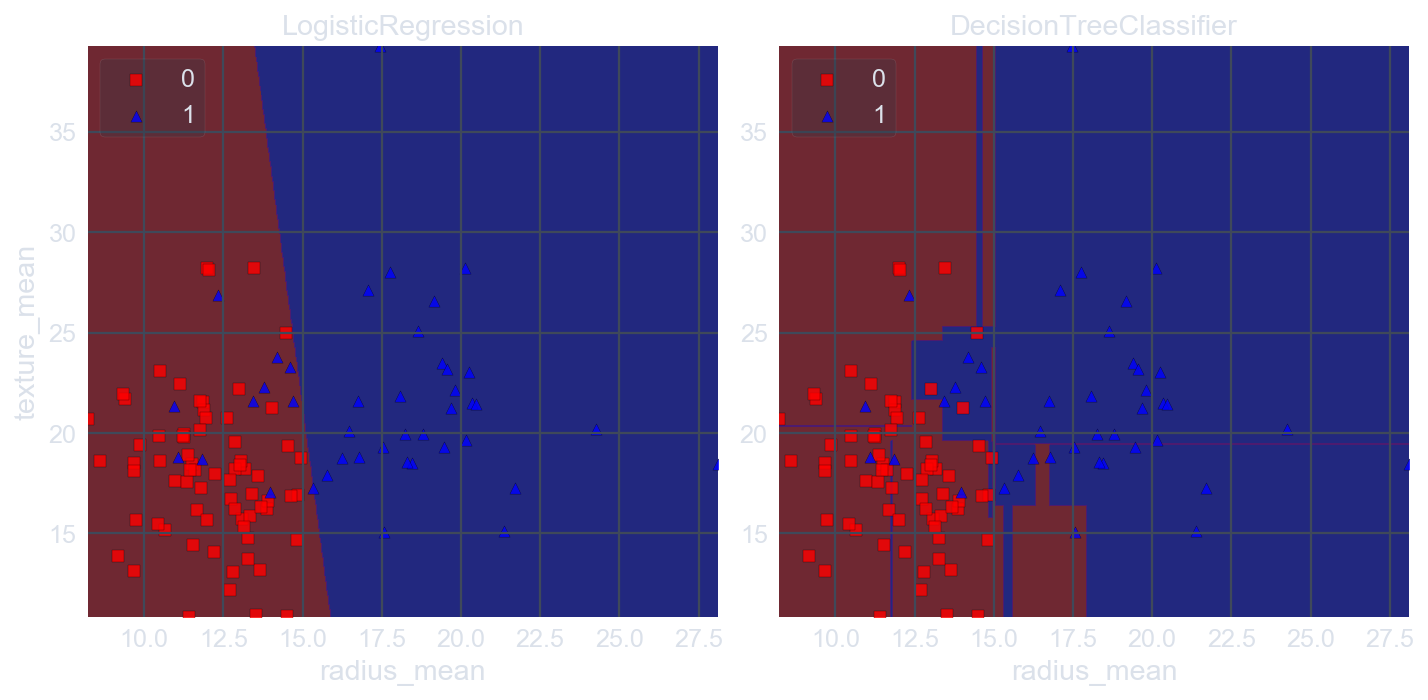

In [8]:
from sklearn.linear_model import LogisticRegression

dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)
dt.fit(X_train, y_train)

logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)

clfs = [logreg, dt]

plot_labeled_decision_regions(X_test, y_test, clfs)

## 2. Classication-Tree Learning

### Building Blocks of a Decision-Tree

* **Decision-Tree**: data structure consisting of a hierarchy of nodes
* **Node**: question or prediction

### Building Blocks of a Decision-Tree

Three kinds of nodes:
* **Root**: *no* parent node, question giving rise to *two* children nodes
* **Internal node**: *one* parent node, question giving rise to *two* children nodes
* **Leaf**: *one* parent node, *no* children nodes --> *prediction*

### Prediction

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Prediction.png' alt='Prediction' width=400 align='left'>

### Information Gain (IG)

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Information_Gain.png' alt='Information Gain' width=400 align='left'>

$$ IG(f, sp) = I(parent) - (\frac{N_{left}}{N} I(left) + \frac{N_{right}}{N} I(right)) $$

* $ f $ - feature
* $ sp $ - split parent
* Criteria to measure the impurity of a node I(node):
    * gini index,
    * entropy. ...

### Classication-Tree Learning

* Nodes are grown recursively
* At each node, split the data based on:
    * feature $f$ and split-point $sp$ to maximize *IG*(node)
    * If *IG*(node)=0, declare the node a leaf. ...

In [9]:
X = wbc.iloc[:, 1:]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=1)
# Instantiate dt, set 'criterion' to 'gini'
dt = DecisionTreeClassifier(criterion='gini', random_state=1)

### Information Criterion in scikit-learn

In [10]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred)
print(accuracy_gini)

0.9298245614035088


### №4 Growing a classification tree

The growth of an unconstrained classification tree followed a few simple rules. Which of the following is not one of these rules?

* The existence of a node depends on the state of its predecessors.
* The impurity of a node can be determined using different criteria such as entropy and the gini-index
* When the information gain resulting from splitting a node is null, the node is declared as a leaf
* *When an internal node is split, the split is performed in such a way so that information gain is minimized*

### №5 Using entropy as a criterion

* Instantiate a `DecisionTreeClassifier` `dt_entropy` with a maximum depth of 8
* Set the information criterion to `'entropy'`
* Fit `dt_entropy` on the training set

In [11]:
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

### №6 Entropy vs Gini index

* Predict the test set labels of `dt_entropy` and assign the result to `y_pred`
* Evaluate the test set accuracy of `dt_entropy` and assign the result to `accuracy_entropy`
* Review `accuracy_entropy` and `accuracy_gini`

In [12]:
y_pred= dt_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred)

print('Accuracy achieved by using entropy: ', accuracy_entropy)
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.9298245614035088
Accuracy achieved by using the gini index:  0.9298245614035088


## 3. Decision-Tree for Regression

### Auto-mpg Dataset

In [13]:
auto = pd.read_csv('Machine_Learning_with_Tree-Based_Models_in_Python/auto.csv')
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


### Auto-mpg with one feature

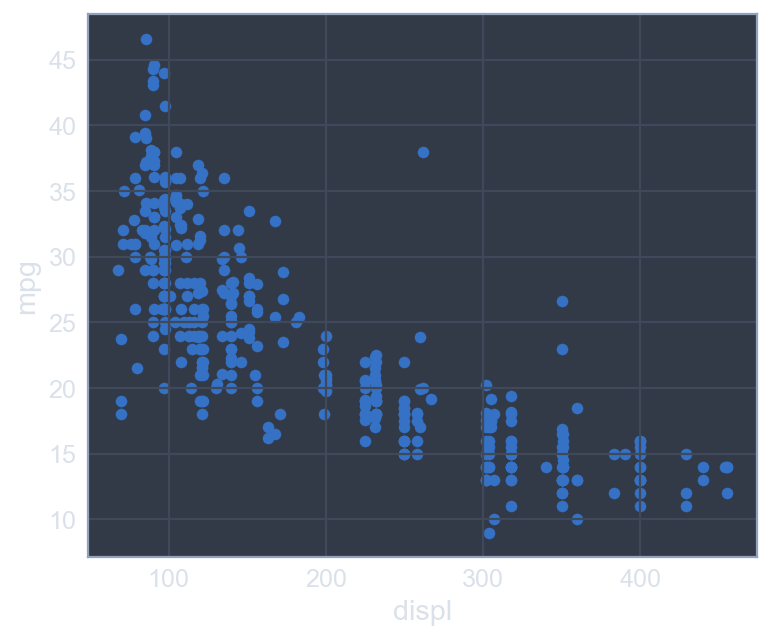

In [14]:
plt.figure(figsize=(6,5))
plt.scatter(auto['displ'], auto['mpg'])

plt.xlabel('displ')
plt.ylabel('mpg')

plt.show()

### Regression-Tree in scikit-learn

In [15]:
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

X = np.array(auto['displ']).reshape(-1, 1)
y = auto['mpg']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=3)
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

In [17]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

mse_dt = MSE(y_test, y_pred)

rmse_dt_1f = mse_dt**(1/2)
print(rmse_dt_1f)

5.102306888903137


### Information Criterion for Regression-Tree

$$ I(node) = MSE(node) = \frac{1}{N_{node}} \sum_{i \in node} (y^{i} - \hat{y_{node}} )^{2} $$
$$ \hat{y_{node}} = \frac{1}{N_{node}} \sum_{i \in node} y^{i} $$

### Prediction

$$ \hat{y}_{pred}(leaf) = \frac{1}{N_{leaf}} \sum_{i \in leaf} y^i $$

### Linear Regression vs. Regression-Tree

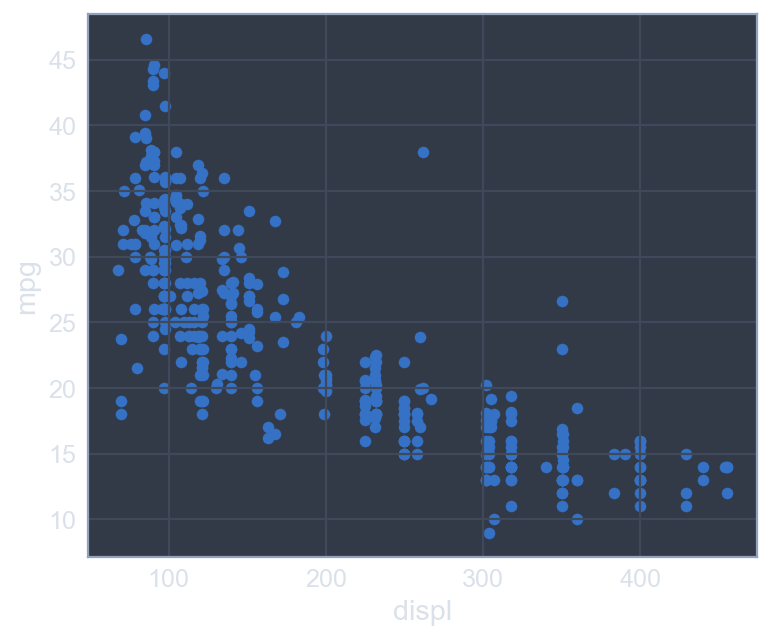

In [18]:
plt.figure(figsize=(6,5))
plt.scatter(auto['displ'], auto['mpg'])

plt.xlabel('displ')
plt.ylabel('mpg')

plt.show()

### №7 Train your first regression tree

* Instantiate a `DecisionTreeRegressor` `dt` with maximum depth 8 and `min_samples_leaf` set to 0.13
* Fit `dt` to the training set

In [19]:
X = pd.get_dummies(auto.iloc[:, 1:])
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=3)

dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.13,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

### №8 Evaluate the regression tree

* Predict the test set labels and assign the output to `y_pred`
* Compute the test set `MSE` by calling MSE and assign the result to `mse_dt`
* Compute the test set `RMSE` and assign it to `rmse_dt`

In [20]:
y_pred = dt.predict(X_test)

mse_dt = MSE(y_test, y_pred)
rmse_dt = mse_dt**(1/2)

print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.37


### №9 Linear regression vs regression tree

* Predict test set labels using the linear regression model (`lr`) and assign the result to `y_pred_lr`
* Compute the test set `MSE` and assign the result to `mse_lr`
* Compute the test set `RMSE` and assign the result to `rmse_lr`

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mse_lr = MSE(y_test, y_pred_lr)
rmse_lr = mse_lr**(1/2)

print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 5.10
Regression Tree test set RMSE: 4.37


## Chapter 2. The Bias-Variance Tradeoff

## 4. Generalization Error

### Supervised Learning - Under the Hood

* Supervised Learning: $y = f(x)$, $f$ is unknown

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Under_the_Hood.png' alt='Under the Hood' width=400 align='left'>

### Goals of Supervised Learning

* Find a model $\hat{f}$ that best approximates f: $\hat{f} ≈ f$ 
* $\hat{f}$ can be LogisticRegression, Decision Tree, Neural Network ...
* Discard noise as much as possible
* **End goal**: $\hat{f}$ should acheive a low predictive error on unseen datasets

### Difculties in Approximating $\hat{f}$

* **Overtting**: $\hat{f}(x)$ ts the training set noise
* **Undertting**: $\hat{f}$(x) is not exible enough to approximate $\hat{f}$

### Overfitting

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Overfitting.png' alt='Overfitting' width=400 align='left'>

### Underfitting

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Underfitting.png' alt='Underfitting' width=400 align='left'>

### Generalization Error

* **Generalization Error of $\hat{f}$**: Does $\hat{f}$ generalize well on unseen data?
* It can be decomposed as follows: Generalization Error of  
$\hat{f} = bias^2 + variance +$ irreducible error

### Bias

* **Bias**: error term that tells you, on average, how much $\hat{f} ≠ f$

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Bias.png' alt='Bias' width=400 align='left'>

### Variance

* **Variance**: tells you how much $\hat{f}$ is inconsistent over different training sets

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Variance.png' alt='Variance' width=400 align='left'>

### Model Complexity

* **ModelComplexity**: sets the exibility of $\hat{f}$
* Example: Maximum tree depth, Minimum samples per leaf, ...

### Bias-Variance Tradeoff

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Bias-Variance_Tradeoff.png' alt='Variance' width=400 align='left'>

### Bias-Variance Tradeoff: A Visual Explanation

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/A_Visual_Explanation.png' alt='A Visual Explanation' width=400 align='left'>

### №10 Complexity, bias and variance

Which of the following correctly describes the relationship between $\hat{f}$'s complexity and $\hat{f}$'s bias and variance terms?

* As the complexity of $\hat{f}$ decreases, the bias term decreases while the variance term increases
* As the complexity of $\hat{f}$ decreases, both the bias and the variance terms increase
* As the complexity of $\hat{f}$ increases, the bias term increases while the variance term decreases
* *As the complexity of $\hat{f}$ increases, the bias term decreases while the variance term increase*

### №11 Overfitting and underfitting

The following figure shows you scatterplots of mpg versus displ along with lines corresponding to the training set predictions of models `A` and `B` in red. Which of the following statements is true?

* `A`  suffers from high bias and overfits the training set
* `A` suffers from high variance and underfits the training set
* *`B` suffers from high bias and underfits the training set*
* `B` suffers from high variance and underfits the training set

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Overfitting_and_underfitting.png' alt='Overfitting and underfitting' width=700 align='left'>

## 5. Diagnosing Bias and Variance Problems

### Estimating the Generalization Error

* How do we estimate the generalization error of a model?
* Cannot be done directly because:
    * $f$ is unknown,
    * usually you only have one dataset,
    * noise is unpredictable

### Estimating the Generalization Error

Solution:
* split the data to training and test sets
* fit $\hat{f}$ to the training set
* evaluate the error of $\hat{f}$ on the **unseen** test set
* generalization error of $\hat{f}$ ≈ test set error of $\hat{f}$

### Better Model Evaluation with Cross-Validation

* Test set should not be touched until we are condent about $\hat{f}$'s performance
* Evaluating $\hat{f}$ on training set: biased estimate, $\hat{f}$ has already seen alltraining points
* Solution→Cross-Validation (CV):
    * K-Fold CV
    * Hold-Out CV

### K-Fold CV

* $ CV error = \frac{E_1 + ... + E_10}{10} $

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/K-Fold_CV.png' alt='K-Fold CV' width=400 align='left'>

### Diagnose Variance Problems

* If suffers from **high variance**: CV error of $\hat{f}$ > training set error of $\hat{f}$
    * $\hat{f}$ is said to overt the training set. To remedy overtting:
        * decrease model complexity,
        * for ex: decrease max depth, increase min samples per leaf, ...
        * gather more data, ..

### Diagnose Bias Problems

* If $\hat{f}$ suffers from high bias: CV error of $\hat{f}$ ≈ training set error of $\hat{f}$ >> desired error
* $\hat{f}$ is said to undert the training set. To remedy undertting:
* increase model complexity
* for ex: increase max depth, decrease min samples per leaf, ...
* gather more relevant features

### K-Fold CV in sklearn on the Auto Dataset

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

SEED = 123

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=SEED)

dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=SEED)

In [23]:
# Evaluate the list of MSE ontained by 10-fold CV
# Set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV = - cross_val_score(dt, X_train, y_train, cv= 10, 
                           scoring='neg_mean_squared_error', n_jobs = -1)

dt.fit(X_train, y_train)

y_predict_train = dt.predict(X_train)
y_predict_test = dt.predict(X_test)

In [24]:
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))
print('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))
print('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))

CV MSE: 20.51
Train MSE: 15.30
Test MSE: 20.92


### №12 Instantiate the model

* Split the data into 70% train and 30% test
* Instantiate a `DecisionTreeRegressor` with max depth 4 and `min_samples_leaf` set to 0.26

In [25]:
SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

### №13 Evaluate the 10-fold CV error

* Compute `dt`'s 10-fold cross-validated `MSE` by setting the `scoring` argument to `'neg_mean_squared_error'`
* Compute `RMSE` from the obtained `MSE` scores

In [26]:
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error', n_jobs=-1)

RMSE_CV = (MSE_CV_scores.mean())**(1/2)
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


### №14 Evaluate the training error

* Fit `dt` to the training set
* Predict `dt`'s training set labels and assign the result to `y_pred_train`
* Evaluate `dt`'s training set MSE and assign it to `RMSE_train`

In [27]:
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)

RMSE_train = (MSE(y_train, y_pred_train))**(1/2)
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


### №15 High bias or high variance?

The training set RMSE (`RMSE_train`) and the CV RMSE (`RMSE_CV`) achieved by `dt` are available in your workspace. In addition, we have also loaded a variable called `baseline_RMSE` which corresponds to the root mean-squared error achieved by the regression-tree trained with the `displ` feature only (it is the RMSE achieved by the regression tree trained in chapter 1, lesson 3). Here `baseline_RMSE` serves as the baseline RMSE above which a model is considered to be underfitting and below which the model is considered 'good enough'

Does `dt` suffer from a high bias or a high variance problem?

* `dt` suffers from high variance because `RMSE_CV` is far less than `RMSE_train`
* *`dt` suffers from high bias because `RMSE_CV` ≈ `RMSE_train` and both scores are greater than `baseline_RMSE`*
* `dt` is a good fit because `RMSE_CV` ≈ `RMSE_train` and both scores are smaller than `baseline_RMSE`

In [28]:
print('Baseline RMSE: {:.2f}'.format(rmse_dt_1f))
print('Train RMSE: {:.2f}'.format(RMSE_train))
print('CV RMSE: {:.2f}'.format(RMSE_CV))

Baseline RMSE: 5.10
Train RMSE: 5.15
CV RMSE: 5.14


## 6. Ensemble Learning

### Advantages of CARTs

* Simple to understand
* Simple to interpret
* Easy to use
* Flexibility: ability to describe non-linear dependencies
* Preprocessing: no need to standardize or normalize features, ...

### Limitations of CARTs

* Classication: can only produce orthogonal decision boundaries
* Sensitive to small variations in the training set
* High variance: unconstrained CARTs may overt the training set
* Solution: ensemble learning

### Ensemble Learning

* Train different models on the same dataset
* Let each model make its predictions
* Meta-model: aggregates predictions ofindividual models
* Final prediction: more robust and less prone to errors
* Best results: models are skillful in different ways

### Ensemble Learning: A Visual Explanation

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Ensemble_Learning_A_Visual_Explanation.png' alt='Ensemble Learning: A Visual Explanation' width=400 align='left'>

### Ensemble Learning in Practice: Voting Classier

* Binary classication task
* N classiers make predictions: $P_1, P_2, ..., P_N$ with $P_i$ = 0 or 1
* Meta-model prediction: hard voting

### Hard Voting

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Hard_Voting.png' alt='Hard Voting' width=400 align='left'>

### Voting Classier in sklearn (Breast-Cancer dataset)

In [29]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

SEED = 1
X = wbc.drop('diagnosis', axis='columns')
y = wbc['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= SEED)

lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)

classifiers = [('Logistic Regression', lr), 
               ('K Nearest Neighbours', knn),
               ('Classification Tree', dt)]

In [30]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.953
K Nearest Neighbours : 0.930
Classification Tree : 0.930


In [31]:
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Voting Classifier: 0.959


### №16 Define the ensemble

* Instantiate a Logistic Regression classifier and assign it to `lr`
* Instantiate a KNN classifier that considers 27 nearest neighbors and assign it to `knn`
* Instantiate a Decision Tree Classifier with the parameter `min_samples_leaf` set to 0.13 and assign it to `dt`

In [32]:
SEED=1

lr = LogisticRegression(random_state=SEED)
knn = KNN(n_neighbors=27)
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

classifiers = [('Logistic Regression', lr), 
               ('K Nearest Neighbours', knn), 
               ('Classification Tree', dt)]

### №17 Evaluate individual classifiers

* Iterate over the tuples in classifiers. Use `clf_name` and `clf` as the `for` loop variables:
    * Fit `clf` to the training set
    * Predict clf's test set labels and assign the results to `y_pred`
    * Evaluate the test set accuracy of `clf` and print the result

In [33]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) 
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.953
K Nearest Neighbours : 0.912
Classification Tree : 0.854


### №18 Better performance with a Voting Classifier

* Instantiate a `VotingClassifier` by setting the parameter `estimators` to `classifiers` and assign it to `vc`
* Fit `vc` to the training set
* Evaluate `vc`'s test set accuracy using the test set predictions `y_pred`

In [34]:
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.924


## Chapter 3. Bagging and Random Forests

## 7. Bagging

### Ensemble Methods

* **Voting Classier**
    * same training set
    * ≠ algorithms
* **Bagging**
    * one algorithm
    * ≠ subsets ofthe training set

### Bagging

* Bagging: Bootstrap Aggregation
* Uses a technique known as the bootstrap
* Reduces variance ofindividual models in the ensemble

### Bootstrap

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Bootstrap.png' alt='Bootstrap' width=400 align='left'>

### Bagging: Training

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Bagging_Training.png' alt='Bagging: Training' width=400 align='left'>

### Bagging: Prediction

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Bagging_Prediction.png' alt='Bagging: Prediction' width=400 align='left'>

### Bagging: Classication & Regression

* **Classication**:
    * Aggregates predictions by majority voting
    * `BaggingClassifier` in scikit-learn
* **Regression**:
    * Aggregates predictions through averaging
    * `BaggingRegressor` in scikit-learn

### Bagging Classier in sklearn (Breast-Cancer dataset)

In [35]:
from sklearn.ensemble import BaggingClassifier

SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=SEED)

In [36]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)
bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.930


### №19 Define the bagging classifier

* Import `DecisionTreeClassifie`r from `sklearn.tree` and `BaggingClassifier` from `sklearn.ensemble`
* Instantiate a `DecisionTreeClassifier` called `dt`
* Instantiate a `BaggingClassifier` called `bc` consisting of 50 trees

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(random_state=1)
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

### №20 Evaluate Bagging performance

* Fit `bc` to the training set
* Predict the test set labels and assign the result to `y_pred`
* Determine `bc`'s test set accuracy

In [38]:
ilp = pd.read_csv('Machine_Learning_with_Tree-Based_Models_in_Python/indian_liver_patient.csv')

X = ilp.iloc[:, :-1]
y = ilp['Liver_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,
                                                    stratify= y, random_state=1)

In [39]:
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

Test set accuracy of bc: 0.69


## 8. Out Of Bag Evaluation

### Bagging

* some instances may be sampled severaltimes for one model
* other instances may not be sampled at all

### Out Of Bag (OOB) instances

* On average, for each model, 63% ofthe training instances are sampled
* The remaining 37% constitute the OOB instances

### OOB Evaluation

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/OOB_Evaluation.png' alt='OOB Evaluation' width=600 align='left'>

### OOB Evaluation in sklearn (Breast Cancer Dataset)

In [40]:
SEED = 1

X = wbc.iloc[:, 1:]
y = wbc['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,
                                                    stratify= y, random_state=SEED)

In [41]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)

bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

In [42]:
test_accuracy = accuracy_score(y_test, y_pred)
print('Test set accuracy: {:.3f}'.format(test_accuracy))

oob_accuracy = bc.oob_score_
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

Test set accuracy: 0.936
OOB accuracy: 0.927


### №21 Prepare the ground

* Import `BaggingClassifier` from `sklearn.ensemble`
* Instantiate a `DecisionTreeClassifier` with `min_samples_leaf` set to 8
* Instantiate a `BaggingClassifier` consisting of 50 trees and set `oob_score` to `True`

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, oob_score=True, random_state=1)

### №22 OOB Score vs Test Set Score

* Fit `bc` to the training set and predict the test set labels and assign the results to `y_pred`
* Evaluate the test set accuracy `acc_test` by calling accuracy_score`
* Evaluate `bc`'s OOB accuracy `acc_oob` by extracting the attribute `oob_score_` from `bc`

In [44]:
X = ilp.iloc[:, :-1]
y = ilp['Liver_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,
                                                    stratify= y, random_state=1)

bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

acc_test = accuracy_score(y_test, y_pred)
acc_oob = bc.oob_score_

print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.726, OOB accuracy: 0.696


## 9. Random Forests

### Bagging

* Base estimator: Decision Tree, LogisticRegression, Neural Net, ...
* Each estimator is trained on a distinct bootstrap sample ofthe training set
* Estimators use all features for training and prediction

### Further Diversity with Random Forests

* Base estimator: Decision Tree
* Each estimator is trained on a different bootstrap sample having the same size as the training set
* RF introduces further randomization in the training of individual trees
* $d$ features are sampled at each node without replacement  
($d$ < total number of features)

### Random Forests: Training

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Random_Forests_Training.png' alt='Random Forests: Training' width=600 align='left'>

### Random Forests: Prediction

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Random_Forests_Prediction.png' alt='Random Forests: Prediction' width=400 align='left'>

### Random Forests: Classication & Regression

* Classication:
    * Aggregates predictions by majority voting
    * `RandomForestClassifier` in scikit-learn
* Regression:
    * Aggregates predictions through averaging
    * `RandomForestRegressor` in scikit-learn

### Random Forests Regressor in sklearn (auto dataset)

In [45]:
from sklearn.ensemble import RandomForestRegressor

SEED = 1
X = pd.get_dummies(auto).iloc[:, 1:]
y = auto['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [46]:
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 3.98


### Feature Importance

* Tree-based methods: enable measuring the importance of each feature in prediction.
* In `sklearn`:
    * how much the tree nodes use a particular feature (weighted average) to reduce impurity
    * accessed using the attribute `feature_importance_`

### Feature Importance in sklearn

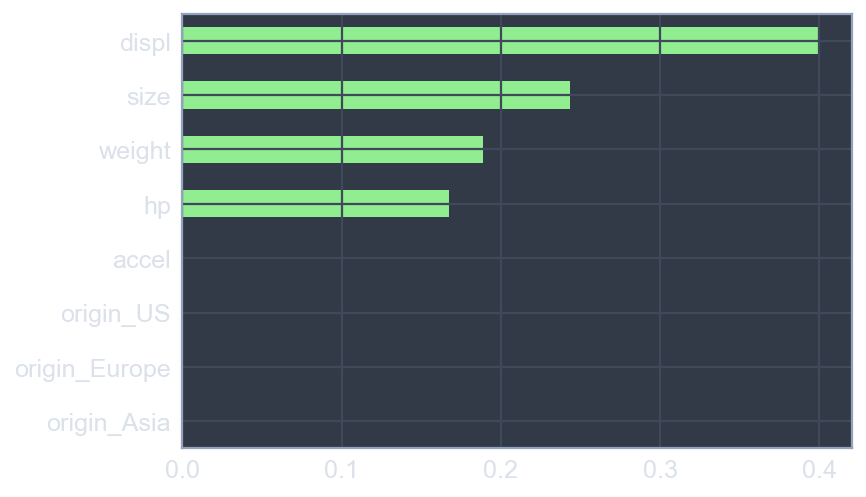

In [47]:
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
sorted_importances_rf = importances_rf.sort_values()

sorted_importances_rf.plot(kind='barh', color='lightgreen');
plt.show()

### №23 Train an RF regressor

* Import `RandomForestRegressor` from `sklearn.ensemble`
* Instantiate a `RandomForestRegressor` called `rf` consisting of 25 trees
* Fit `rf` to the training set

In [48]:
bikes = pd.read_csv('Machine_Learning_with_Tree-Based_Models_in_Python/bikes.csv')

X = bikes.drop('cnt', axis='columns')
y = bikes['cnt']

In [49]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf = RandomForestRegressor(n_estimators=25, random_state=2)
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

### №24 Evaluate the RF regressor

* Import `mean_squared_error` from `sklearn.metrics` as `MSE`
* Predict the test set labels and assign the result to `y_pred`
* Compute the test set `RMSE` and assign it to `rmse_test`

In [50]:
from sklearn.metrics import mean_squared_error as MSE

y_pred = rf.predict(X_test)

rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.84


### №25 Visualizing features importances

* Call the `.sort_values()` method on `importances` and assign the result to `importances_sorted`
* Call the `.plot()` method on `importances_sorted` and set the arguments:
    * `kind` to `'barh'`
    * `color` to `'lightgreen'`

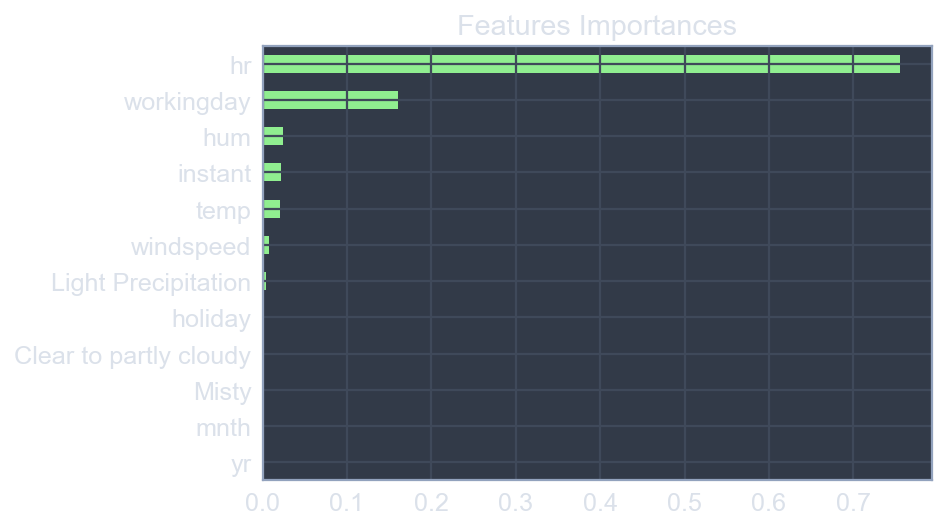

In [51]:
importances = pd.Series(data=rf.feature_importances_, index= X_train.columns)

importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='lightgreen')

plt.title('Features Importances')
plt.show()

## Chapter 4. Boosting

## 10. AdaBoost

### Boosting

* **Boosting**: Ensemble method combining several weak learners to form a strong learner
* **Weak learner**: Model doing slightly better than random guessing
* Example of weak learner: Decision stump (CART whose maximum depth is 1)

### Boosting

* Train an ensemble of predictors sequentially
* Each predictor tries to correct its predecessor
* Most popular boosting methods:
    * AdaBoost
    * Gradient Boosting

### Adaboost

* Stands for **Ada**ptive **Boost**ing
* Each predictor pays more attention to the instances wrongly predicted by its predecessor
* Achieved by changing the weights oftraining instances
* Each predictor is assigned a coefcient $\alpha$
* $\alpha$ depends on the predictor's training error

### AdaBoost: Training

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/AdaBoost_Training.png' alt='AdaBoost: Training' width=600 align='left'>

### Learning Rate

* Learning rate: 0 < $\eta$ ≤ 1

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/AdaBoost_Training.png' alt='AdaBoost: Training' width=600 align='left'>

### AdaBoost: Prediction

* Classication:
    * Weighted majority voting
    * In sklearn: `AdaBoostClassifier`
* Regression:
    * Weighted average
    * In sklearn: `AdaBoostRegressor`

### AdaBoost Classication in sklearn (Breast Cancer dataset)

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

SEED = 1
X = wbc.iloc[:, 1:]
y = wbc['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,
                                                    random_state=SEED)

In [53]:
dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)

adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)
adb_clf.fit(X_train, y_train)

y_pred_proba = adb_clf.predict_proba(X_test)[:,1]

adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

ROC AUC score: 0.99


### №26 Define the AdaBoost classifier

* Import `AdaBoostClassifier` from `sklearn.ensemble`
* Instantiate a `DecisionTreeClassifier` with `max_depth` set to 2
* Instantiate an `AdaBoostClassifier` consisting of 180 trees and setting the `base_estimator` to `dt`

In [54]:
X = ilp.iloc[:, :-1]
y = ilp['Liver_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    random_state=SEED)

In [55]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_depth=2, random_state=1)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

### №27 Train the AdaBoost classifier

* Fit `ada` to the training set
* Evaluate the probabilities of obtaining the positive class in the test set

In [56]:
ada.fit(X_train, y_train)
y_pred_proba = ada.predict_proba(X_test)[:, 1]

### №28 Evaluate the AdaBoost classifier

* Import `roc_auc_score` from `sklearn.metrics`
* Compute `ada`'s test set ROC AUC score, assign it to `ada_roc_auc`, and print it out

In [57]:
from sklearn.metrics import roc_auc_score

ada_roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.74


## 11. Gradient Boosting (GB)

### Gradient Boosted Trees

* Sequential correction of predecessor's errors
* Does not tweak the weights oftraining instances
* Fit each predictor is trained using its predecessor's residual errors as labels
* Gradient Boosted Trees: a CART is used as a base learner

### Gradient Boosted Trees for Regression: Training

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Gradient_Boosted_Trees_for_Regression_Training.png' alt='Gradient Boosted Trees for Regression: Training' width=600 align='left'>

### Shrinkage

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Shrinkage.png' alt='Shrinkage' width=600 align='left'>

### Gradient Boosted Trees: Prediction

* Regression:
    * $y_{pred} = y_1 + \eta r_1 + ... + \eta r_N$
    * In sklearn: `GradientBoostingRegressor`
* Classication:
    * In sklearn: `GradientBoostingClassifier`

### Gradient Boosting in sklearn (auto dataset)

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

SEED = 1
X = pd.get_dummies(auto).iloc[:, 1:]
y = auto['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [59]:
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)
gbt.fit(X_train, y_train)

y_pred = gbt.predict(X_test)

rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 4.01


### №29 Define the GB regressor

* Import `GradientBoostingRegressor` from `sklearn.ensemble`
* Instantiate a gradient boosting regressor by setting the parameters:
    * `max_depth` to 4
    * `n_estimators` to 200

In [60]:
X = bikes.drop('cnt', axis='columns')
y = bikes['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=2)

### №30 Train the GB regressor

* Fit `gb` to the training set
* Predict the test set labels and assign the result to `y_pred`

In [62]:
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

### №31 Evaluate the GB regressor

* Import `mean_squared_error` from `sklearn.metrics` as `MSE`
* Compute the test set MSE and assign it to `mse_test`
* Compute the test set RMSE and assign it to `rmse_test`

In [63]:
from sklearn.metrics import mean_squared_error as MSE

mse_test = MSE(y_test, y_pred)

rmse_test = mse_test**(1/2)
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 43.132


## 12. Stochastic Gradient Boosting (SGB)

### Gradient Boosting: Cons

* GB involves an exhaustive search procedure
* Each CART is trained to nd the best split points and features
* May lead to CARTs using the same split points and maybe the same features

### Stochastic Gradient Boosting

* Each tree is trained on a random subset of rows ofthe training data
* The sampled instances (40%-80% ofthe training set) are sampled without replacement
* Features are sampled (without replacement) when choosing split points
* Result: further ensemble diversity
* Effect: adding further variance to the ensemble oftrees

### Stochastic Gradient Boosting: Training

<img src='Machine_Learning_with_Tree-Based_Models_in_Python/Pictures/Stochastic_Gradient_Boosting_Training.png' alt='Stochastic Gradient Boosting: Training' width=600 align='left'>

### Stochastic Gradient Boosting in sklearn (auto dataset)

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

SEED = 1
X = pd.get_dummies(auto).iloc[:, 1:]
y = auto['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [65]:
sgbt = GradientBoostingRegressor(max_depth=1, subsample=0.8, max_features=0.2,
                                 n_estimators=300, random_state=SEED)
sgbt.fit(X_train, y_train)
y_pred = sgbt.predict(X_test)

In [66]:
rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 3.95


### №32 Regression with SGB

* Instantiate a Stochastic Gradient Boosting Regressor (SGBR) and set:
    * `max_depth` to 4 and `n_estimators` to 200
    * `subsample` to 0.9, and
    * `max_features` to 0.75

In [67]:
X = bikes.drop('cnt', axis='columns')
y = bikes['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

sgbr = GradientBoostingRegressor(max_depth=4, subsample=0.9, max_features=0.75,
                                 n_estimators=200, random_state=2)

### №33 Train the SGB regressor

* Fit sgbr to the training set
* Predict the test set labels and assign the results to `y_pred`

In [69]:
sgbr.fit(X_train, y_train)
y_pred = sgbr.predict(X_test)

### №34 Evaluate the SGB regressor

* Import `mean_squared_error` as `MSE` from `sklearn.metrics`
* Compute test set MSE and assign the result to `mse_test`
* Compute test set RMSE and assign the result to `rmse_test`

In [70]:
from sklearn.metrics import mean_squared_error as MSE

mse_test = MSE(y_test, y_pred)

rmse_test = mse_test**(1/2)
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 44.747


## Chapter 5. Model Tuning

## 13. Tuning a CART's hyperparameters

### Hyperparameters

Machine learning model:
* **parameters**: learned from data
    * CART example: split-point of a node, split-feature of a node, ...
* **hyperparameters**: not learned from data, set prior to training
    * CART example: `max_depth`, `min_samples_leaf`, splitting criterion ...

### What is hyperparameter tuning?

* **Problem**: search for a set of optimal hyperparameters for a learning algorithm
* **Solution**: find a set of optimal hyperparameters that results in an optimal model
* **Optimal model**: yields an optimal **score**
* **Score**: in sklearn defaults to accuracy (classication) and R^2 (regression)
* Cross validation is used to estimate the generalization performance

### Why tune hyperparameters?

* In `sklearn`, a model's default hyperparameters are not optimal for all problems
* Hyperparameters should be tuned to obtain the best model performance

### Approaches to hyperparameter tuning

* Grid Search
* Random Search
* Bayesian Optimization
* GeneticAlgorithms
* ...

### Grid search cross validation

* Manually set a grid of discrete hyperparameter values
* Set a metric for scoring model performance
* Search exhaustively through the grid
* For each set of hyperparameters, evaluate each model's CV score
* The optimal hyperparameters are those ofthe model achieving the best CV score

### Grid search cross validation: example

* Hyperparameters grids:
    * `max_depth` = {2,3,4},
    * `min_samples_leaf` = {0.05, 0.1}
* hyperparameter space = { (2,0.05) , (2,0.1) , (3,0.05), ... }
* CV scores = { $score_{(2,0.05)}$ , ... }
* optimal hyperparameters = set of hyperparameters corresponding to the best CV score

### Inspecting the hyperparameters of a CART in sklearn

In [71]:
from sklearn.tree import DecisionTreeClassifier

SEED = 1

X = wbc.iloc[:, 1:]
y = wbc['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

dt = DecisionTreeClassifier(random_state=SEED)
print(dt.get_params())

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 1, 'splitter': 'best'}


In [72]:
from sklearn.model_selection import GridSearchCV

params_dt = {'max_depth': [3, 4,5, 6], 
             'min_samples_leaf': [0.04, 0.06, 0.08],
             'max_features': [0.2, 0.4,0.6, 0.8]}

grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, 
                       scoring='accuracy', cv=10, n_jobs=-1)
grid_dt.fit(X_train, y_train)

/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5, 6], 'min_samples_leaf': [0.04, 0.06, 0.08], 'max_features': [0.2, 0.4, 0.6, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

### Extracting the best hyperparameters

In [73]:
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters:\n' , best_hyperparams)

Best hyperparameters:
 {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.06}


In [74]:
best_CV_score = grid_dt.best_score_
print('Best CV accuracy {:.3f}'.format(best_CV_score))

Best CV accuracy 0.934


### Extracting the best estimator

In [75]:
best_model = grid_dt.best_estimator_

test_acc = best_model.score(X_test, y_test)
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.868


### №35 Tree hyperparameters

Which of the following is not a hyperparameter of `dt`?

* `min_impurity_decrease`
* `min_weight_fraction_leaf`
* *`min_features`*
* `splitter`

In [76]:
dt.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 1,
 'splitter': 'best'}

### №36 Set the tree's hyperparameter grid

* Define a grid of hyperparameters corresponding to a Python dictionary called `params_dt` with:
    * the key `'max_depth'` set to a list of values 2, 3, and 4
    * the key `'min_samples_leaf'` set to a list of values 0.12, 0.14, 0.16, 0.18

In [77]:
params_dt = {'max_depth': [2, 3, 4],
             'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]}

### №37 Search for the optimal tree

* Import `GridSearchCV` from `sklearn.model_selection`
* Instantiate a `GridSearchCV` object using 5-fold CV by setting the parameters:
    * `estimator` to `dt`, `param_grid` to `params_dt` and
    * `scoring` to `'roc_auc'`

In [78]:
from sklearn.model_selection import GridSearchCV

grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='roc_auc', cv=5, n_jobs=-1)

In [79]:
X = ilp.iloc[:, :-1]
y = ilp['Liver_disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4], 'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

### №38 Evaluate the optimal tree

* Import `roc_auc_score` from `sklearn.metrics`
* Extract the `.best_estimator_` attribute from `grid_dt` and assign it to `best_model`
* Predict the test set probabilities of obtaining the positive class `y_pred_proba`
* Compute the test set ROC AUC score `test_roc_auc` of `best_model`

In [80]:
from sklearn.metrics import roc_auc_score

best_model = grid_dt.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.685


## 14. Tuning an RF's Hyperparameters

### Random Forests Hyperparameters

* CART hyperparameters
* number of estimators
* bootstrap
* ....

### Tuning is expensive

* Hyperparameter tuning:
    * computationally expensive
    * sometimes leads to very slight improvement
* Weight the impact oftuning on the whole project

### Inspecting RF Hyperparameters in sklearn

In [81]:
from sklearn.ensemble import RandomForestRegressor

SEED = 1

X = wbc.iloc[:, 1:]
y = wbc['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf = RandomForestRegressor(random_state= SEED)
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [82]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

params_rf = {'n_estimators': [300, 400, 500],
             'max_depth': [4, 6, 8],
             'min_samples_leaf': [0.1, 0.2],
             'max_features': ['log2','sqrt']}

grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv=3,
                       scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

### Searching for the best hyperparameters

In [83]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   15.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [300, 400, 500], 'max_depth': [4, 6, 8], 'min_samples_leaf': [0.1, 0.2], 'max_features': ['log2', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

### Extracting the best hyperparameters

In [84]:
best_hyperparams = grid_rf.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'n_estimators': 500}


### Evaluating the best model performance

In [85]:
best_model = grid_rf.best_estimator_
y_pred = best_model.predict(X_test)

rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.25


### №39 Random forests hyperparameters

Which of the following is not a hyperparameter of `rf`?

* `min_weight_fraction_leaf`
* `criterion`
* `learning_rate`
* `warm_start`

In [86]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

### №40 Set the hyperparameter grid of RF

* Define a grid of hyperparameters corresponding to a Python dictionary called `params_rf` with:
    * the key `'n_estimators'` set to a list of values 100, 350, 500
    * the key `'max_features'` set to a list of values `'log2'`, `'auto'`, `'sqrt'`
    * the key `'min_samples_leaf'` set to a list of values 2, 10, 30

In [87]:
params_rf = {'n_estimators': [100, 350, 500],
             'max_features': ['log2', 'auto', 'sqrt'],
             'min_samples_leaf': [2, 10, 30]}

### №41 Search for the optimal forest

* Import `GridSearchCV` from `sklearn.model_selection`
* Instantiate a `GridSearchCV` object using 3-fold CV by using negative mean squared error as the scoring metric

In [88]:
from sklearn.model_selection import GridSearchCV

grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, scoring='neg_mean_squared_error',
                       cv=3, verbose=1, n_jobs=-1)

In [89]:
X = bikes.drop('cnt', axis='columns')
y = bikes['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   17.0s finished
/Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 350, 500], 'max_features': ['log2', 'auto', 'sqrt'], 'min_samples_leaf': [2, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

### №42 Evaluate the optimal forest

* Import `mean_squared_error` as `MSE` from `sklearn.metrics`
* Extract the best estimator from `grid_rf` and assign it to `best_model`
* Predict `best_model`'s test set labels and assign the result to `y_pred`
* Compute `best_model`'s test set RMSE

In [90]:
from sklearn.metrics import mean_squared_error as MSE

best_model = grid_rf.best_estimator_
y_pred = best_model.predict(X_test)

rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Test RMSE of best model: 51.779
